### <span style="color:black">Import the Libraries</span>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

### <span style="color:black">Loading Data</span>

In [2]:
bank_df = pd.read_csv("FirstBankCreditCardCustomersChurners.csv")

### <span style="color:black">Data Summary</span>

In [3]:
bank_df.shape

(10127, 21)

In [4]:
bank_df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [5]:
bank_df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [6]:
bank_df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [7]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

- There are a total of 21 columns and 10,127 observations in the dataset
- We can see that Education_Level and Marital_Status have less than 10,127 non-null values i.e. columns have missing values.

### <span style="color:black">Duplicates</span>

In [8]:
#Let's check for duplicate values in the data
bank_df.duplicated().sum()

0

### <span style="color:black">Missing data</span>

In [9]:
print(bank_df.isna().sum())

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64



In our dataset, we will replace null values in the 'Education_Level' and 'Marital_Status' columns with the string 'unknown' since these represent incomplete customer details captured during the onboarding process.

-----

In [10]:
bank_df['Attrition_Flag'] = bank_df['Attrition_Flag'].replace({'Existing Customer':0, 'Attrited Customer': 1})

bank_df = bank_df.drop('CLIENTNUM', axis=1).copy() 

C:\Users\DELL\AppData\Local\Temp\ipykernel_10804\383096408.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank_df['Attrition_Flag'] = bank_df['Attrition_Flag'].replace({'Existing Customer':0, 'Attrited Customer': 1})


---

In [11]:
bank_df.select_dtypes(exclude='object').columns

Index(['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [12]:
bank_df.select_dtypes(include='object').columns 

Index(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
       'Card_Category'],
      dtype='object')

In [13]:
num_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

cat_cols = ['Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category']

model_features = num_cols + cat_cols

model_target = 'Attrition_Flag'

In [14]:
# Pipeline To preprocess the numerical features

numeric_processor = Pipeline(steps=[ 
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('num_scaler', MinMaxScaler())
])

# Pipeline to preprocess the categorical features

categorical_processor = Pipeline(steps=[ 
    ('cat_imputer', SimpleImputer(strategy='constant', fill_value='unknown')), 
    ('cat_encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine all data preprocessors from above (add more, if you choose to define more!)
# For each processor/step specify: a name, the actual process, and finally the features to be processed

data_preprocessor = ColumnTransformer(transformers=[
    ('numerical_pre', numeric_processor, num_cols),
    ('categorical_pre', categorical_processor, cat_cols)
])

In [15]:
pipeline = Pipeline(steps=[ 
    ('data_preprocessing', data_preprocessor),
    ('model', RandomForestClassifier()) 
])

from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('numerical_pre',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer()),
                                                                  ('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Customer_Age',
                                                   'Dependent_count',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   '...
                                                   'Total_Trans_Amt',
                                                   'Total_Trans_Ct',
                                                   'Total_Ct_Chng_Q4_Q1',
                                                   'Avg_Utilization_Ratio']),
                                                 ('categorical_pre',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('cat_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Education_Level',
                                                   'Marital_Status',
                                                   'Income_Category',
                                                   'Card_Category'])])),
                ('model', RandomForestClassifier())])

In [16]:
train_data, test_data = train_test_split(bank_df, test_size=0.1, shuffle=True, stratify=bank_df[model_target], 
                                         random_state=23)

bank_df.shape, train_data.shape, test_data.shape  

((10127, 20), (9114, 20), (1013, 20))

In [17]:
# Get train data to train the pipeline
X_train, y_train = train_data[model_features], train_data[model_target]

# Get test data to test the pipeline
X_test, y_test = test_data[model_features], test_data[model_target]

----

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7650
           1       1.00      1.00      1.00      1464

    accuracy                           1.00      9114
   macro avg       1.00      1.00      1.00      9114
weighted avg       1.00      1.00      1.00      9114

Model Accuracy (training): 1.00


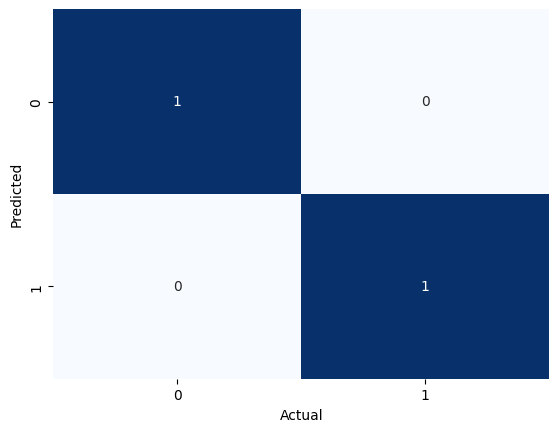

In [18]:
# Fit the Pipeline to training data
pipeline.fit(X_train, y_train)

# Use the fitted pipeline to make predictions on the train dataset
train_predictions = pipeline.predict(X_train)
sns.heatmap(confusion_matrix(y_train, train_predictions, normalize='true'), annot=True, cbar=False, cmap="Blues")
plt.xlabel('Actual')
plt.ylabel('Predicted')
print(classification_report(y_train, train_predictions))
print(f"Model Accuracy (training): {accuracy_score(y_train, train_predictions):.2f}")

Axes(0.125,0.11;0.775x0.77)
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       850
           1       0.93      0.79      0.85       163

    accuracy                           0.96      1013
   macro avg       0.95      0.89      0.91      1013
weighted avg       0.96      0.96      0.96      1013

Model Accuracy (test): 0.96


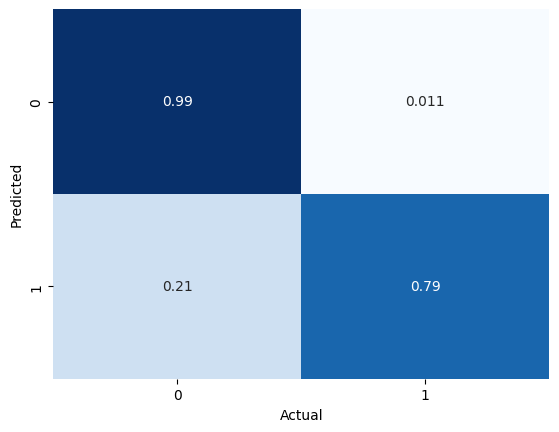

In [19]:
# Use the fitted pipeline to make predictions on the test dataset
test_predictions = pipeline.predict(X_test)
print(sns.heatmap(confusion_matrix(y_test, test_predictions, normalize='true'), annot=True, cbar=False, cmap="Blues"))
plt.xlabel('Actual')
plt.ylabel('Predicted')
print(classification_report(y_test, test_predictions))
print(f"Model Accuracy (test): {accuracy_score(y_test, test_predictions):.2f}")

CROSS VALIDATION

In [20]:
from sklearn.model_selection import cross_val_score, KFold

# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
scores = cross_val_score(pipeline, bank_df[model_features], bank_df[model_target], cv=num_folds, scoring='accuracy')

#Evaluate the result
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())

Cross-validation scores: [0.88252715 0.95952616 0.95753086 0.96296296 0.84839506]
Mean accuracy: 0.9221884391795546
Standard deviation of accuracy: 0.047590408344781704


----

In [21]:
feats = X_train.columns
importance = pipeline.named_steps['model'].feature_importances_ 

feat_importance_df = pd.DataFrame(zip(feats, importance), columns=['Features', 'Importance'])
top10_df = feat_importance_df.sort_values(by=['Importance'], ascending=False).head(10) #<--- Top 10 Features
top10_df

,Features,Importance
10,Total_Trans_Amt,0.183783
11,Total_Trans_Ct,0.160071
7,Total_Revolving_Bal,0.105990
12,Total_Ct_Chng_Q4_Q1,0.101838
13,Avg_Utilization_Ratio,0.063142
9,Total_Amt_Chng_Q4_Q1,0.061966
3,Total_Relationship_Count,0.059578
6,Credit_Limit,0.034800
8,Avg_Open_To_Buy,0.033330
0,Customer_Age,0.032915


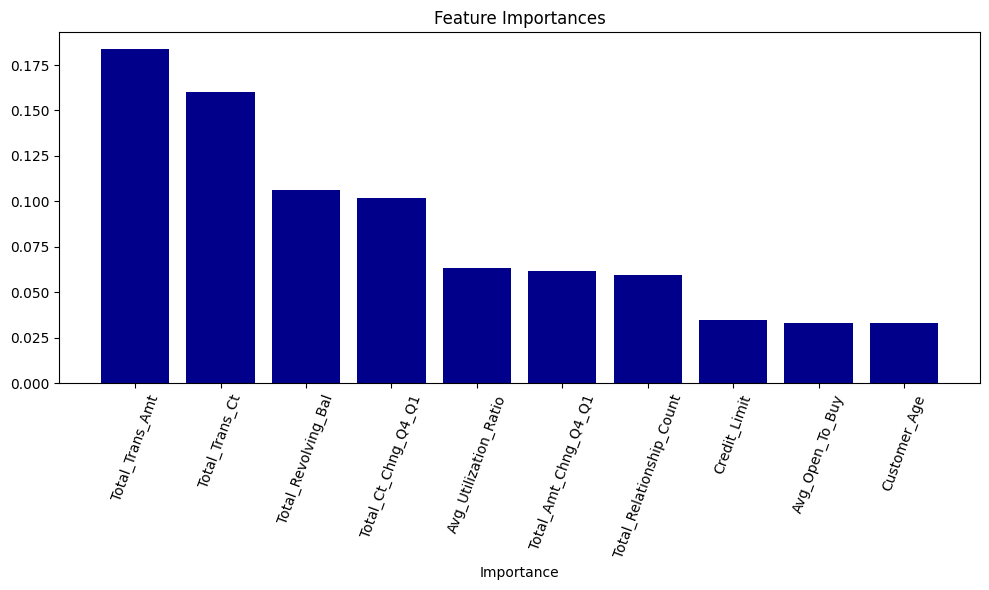

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(top10_df['Features'], top10_df['Importance'], color='darkblue')
plt.xticks(rotation=70)
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

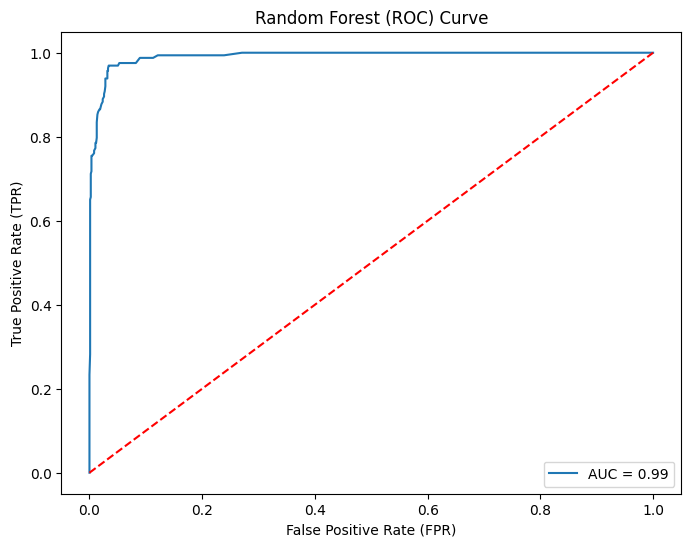

In [23]:
# Generate predicted probabilities for the positive class
y_scores = pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute AUC
auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Random Forest (ROC) Curve')
plt.legend()
plt.show() 

In [24]:
import joblib

# Save the model
joblib.dump(pipeline, 'model_pipe.pkl')

['model_pipe.pkl']

---

In [25]:
bank_df.to_dict(orient='records')[-1]

{'Attrition_Flag': 1,
 'Customer_Age': 43,
 'Gender': 'F',
 'Dependent_count': 2,
 'Education_Level': 'Graduate',
 'Marital_Status': 'Married',
 'Income_Category': 'Less than $40K',
 'Card_Category': 'Silver',
 'Months_on_book': 25,
 'Total_Relationship_Count': 6,
 'Months_Inactive_12_mon': 2,
 'Contacts_Count_12_mon': 4,
 'Credit_Limit': 10388.0,
 'Total_Revolving_Bal': 1961,
 'Avg_Open_To_Buy': 8427.0,
 'Total_Amt_Chng_Q4_Q1': 0.703,
 'Total_Trans_Amt': 10294,
 'Total_Trans_Ct': 61,
 'Total_Ct_Chng_Q4_Q1': 0.649,
 'Avg_Utilization_Ratio': 0.189}

In [26]:
d_dict = {'Customer_Age': 43,
 'Gender': 'F',
 'Dependent_count': 2,
 'Education_Level': 'Graduate',
 'Marital_Status': 'Married',
 'Income_Category': 'Less than $40K',
 'Card_Category': 'Silver',
 'Months_on_book': 25,
 'Total_Relationship_Count': 6,
 'Months_Inactive_12_mon': 2,
 'Contacts_Count_12_mon': 4,
 'Credit_Limit': 10388.0,
 'Total_Revolving_Bal': 1961,
 'Avg_Open_To_Buy': 8427.0,
 'Total_Amt_Chng_Q4_Q1': 0.703,
 'Total_Trans_Amt': 10294,
 'Total_Trans_Ct': 61,
 'Total_Ct_Chng_Q4_Q1': 0.649,
 'Avg_Utilization_Ratio': 0.189}

pred = pipeline.predict(pd.DataFrame([d_dict]))[0]
prediction = 'This customer will not churn' if pred == 0 else "This customer will churn"
print(prediction)

This customer will churn


----